In [1]:
## IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
### LOADING THE USER RATING DATA
col_names = ['userId', 'itemId', 'rating', 'timestamp']
df = pd.read_csv('u.data', sep = '\t', names = col_names)
df.head()

,userId,itemId,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [3]:
### LOADING THE MOVIES_TITLE_ID DATA
movies_titles = pd.read_csv('movie_titles_id.csv', header=None, skiprows=1)


movies_titles.columns = ['itemId', 'title']


movies_titles = movies_titles[movies_titles['itemId'] != 'item_id']


movies_titles = movies_titles.reset_index(drop=True)


movies_titles.to_csv('corrected_movie_titles.csv', index=False)


movies_titles.head()

,itemId,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [4]:
df['itemId'] = df['itemId'].astype(str) 
movies_titles['itemId'] = movies_titles['itemId'].astype(str)  

In [5]:
### MERGING THE ABOVE 2 DATAFRAMES
df = pd.merge(df, movies_titles, on = 'itemId')
df.head()

,userId,itemId,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,0,172,5,881250949,"""Empire Strikes Back, The (1980)"""
2,0,133,1,881250949,Gone with the Wind (1939)
3,196,242,3,881250949,Kolya (1996)
4,186,302,3,891717742,L.A. Confidential (1997)


#### EXPLORATORY DATA ANALYSIS

In [6]:
df.groupby('title')['rating'].mean().sort_values(ascending = False).head()

title
Entertaining Angels: The Dorothy Day Story (1996)    5.0
Marlene Dietrich: Shadow and Light (1996)            5.0
Star Kid (1997)                                      5.0
"Saint of Fort Washington, The (1993)"               5.0
Someone Else's America (1995)                        5.0
Name: rating, dtype: float64

In [7]:
df.groupby('title')['rating'].count().sort_values(ascending = False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [8]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
"""20,000 Leagues Under the Sea (1954)""",3.500000
"""39 Steps, The (1935)""",4.050847
"""Abyss, The (1989)""",3.589404
"""Addiction, The (1995)""",2.181818
"""Adventures of Pinocchio, The (1996)""",3.051282


In [9]:
ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,num of ratings
title,,
"""20,000 Leagues Under the Sea (1954)""",3.500000,72
"""39 Steps, The (1935)""",4.050847,59
"""Abyss, The (1989)""",3.589404,151
"""Addiction, The (1995)""",2.181818,11
"""Adventures of Pinocchio, The (1996)""",3.051282,39


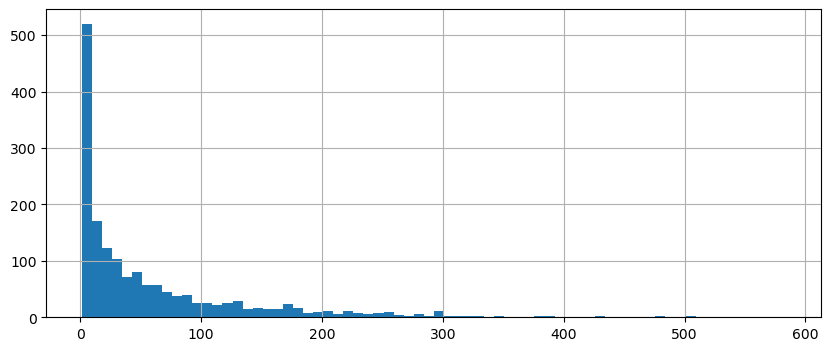

In [10]:
plt.figure(figsize = (10,4))
ratings['num of ratings'].hist(bins = 70)
plt.show()

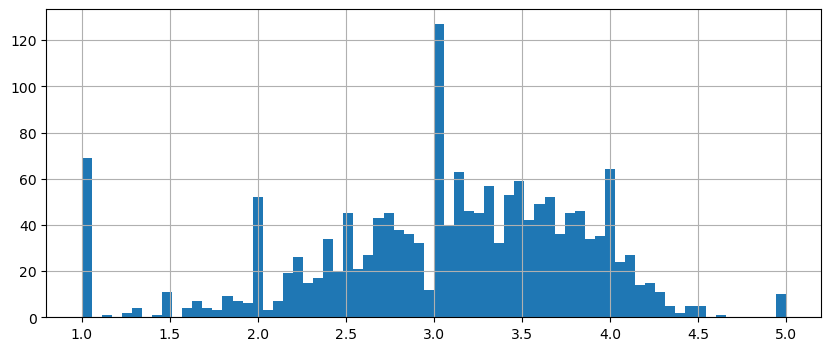

In [11]:
plt.figure(figsize = (10,4))
ratings['rating'].hist(bins = 70)
plt.show()

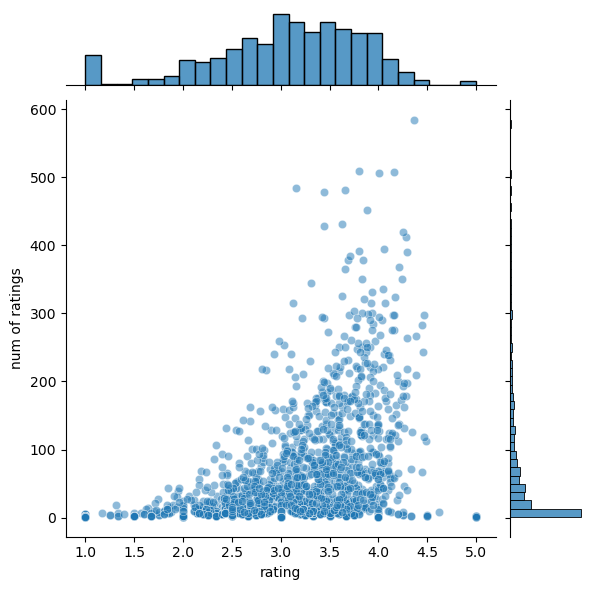

In [12]:
sns.jointplot(x = 'rating', y = 'num of ratings', data = ratings, alpha = 0.5)
plt.show()

##### RECOMMENDING THE SIMILAR TYPE OF MOVIES TO THE USERS, THEREFORE, BUILT PIVOT TABLE THAT SAYS THAT 
##### OUR RATING MATRIX IS SPARSE.


#### RECOMMENDATIONS BASED ON CORRELATION BETWEEN THE MOVIES

In [13]:
movie_mat = df.pivot_table(index = 'userId', columns = 'title', values = 'rating')
movie_mat.head()

title,"""20,000 Leagues Under the Sea (1954)""","""39 Steps, The (1935)""","""Abyss, The (1989)""","""Addiction, The (1995)""","""Adventures of Pinocchio, The (1996)""","""Adventures of Priscilla, Queen of the Desert, The (1994)""","""Adventures of Robin Hood, The (1938)""","""Affair to Remember, An (1957)""","""African Queen, The (1951)""","""Age of Innocence, The (1993)""",...,Wyatt Earp (1994),Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
userId,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5.0,3.0,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
ratings.sort_values('num of ratings', ascending = False).head(10)

,rating,num of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"""English Patient, The (1996)""",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [15]:
ratings.head()

,rating,num of ratings
title,,
"""20,000 Leagues Under the Sea (1954)""",3.500000,72
"""39 Steps, The (1935)""",4.050847,59
"""Abyss, The (1989)""",3.589404,151
"""Addiction, The (1995)""",2.181818,11
"""Adventures of Pinocchio, The (1996)""",3.051282,39


In [16]:
starwars_user_ratings = movie_mat['Star Wars (1977)']
liarliar_user_ratings = movie_mat['Liar Liar (1997)']
starwars_user_ratings.head()

userId
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [17]:
similar_to_starwars = movie_mat.corrwith(starwars_user_ratings)
similar_to_liarliar = movie_mat.corrwith(liarliar_user_ratings)

##### GIVING TOP 5 RECOMMENDATION OF MOVIES BASED ON STARWARS

In [18]:
corr_starwars = pd.DataFrame(similar_to_starwars, columns = ['Correlation'])
corr_starwars.dropna(inplace = True)
corr_starwars.head()

,Correlation
title,
"""20,000 Leagues Under the Sea (1954)""",0.289768
"""39 Steps, The (1935)""",0.106453
"""Abyss, The (1989)""",0.203709
"""Addiction, The (1995)""",0.507093
"""Adventures of Pinocchio, The (1996)""",0.111616


In [19]:
corr_starwars.sort_values('Correlation', ascending = False).head(10)


,Correlation
title,
No Escape (1994),1.0
Commandments (1997),1.0
Man of the Year (1995),1.0
Hollow Reed (1996),1.0
Star Wars (1977),1.0
Stripes (1981),1.0
Cosi (1996),1.0
Mondo (1996),1.0
Hurricane Streets (1998),1.0


In [20]:
corr_starwars = corr_starwars.join(ratings['num of ratings'])
corr_starwars.head()

,Correlation,num of ratings
title,,
"""20,000 Leagues Under the Sea (1954)""",0.289768,72
"""39 Steps, The (1935)""",0.106453,59
"""Abyss, The (1989)""",0.203709,151
"""Addiction, The (1995)""",0.507093,11
"""Adventures of Pinocchio, The (1996)""",0.111616,39


In [21]:
corr_starwars[corr_starwars['num of ratings']>100].sort_values('Correlation', ascending = False).head()

,Correlation,num of ratings
title,,
Star Wars (1977),1.000000,584
"""Empire Strikes Back, The (1980)""",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


##### GIVING TOP 5 RECOMMENDATION OF MOVIES BASED ON LIAR LIAR

In [22]:
corr_liarliar = pd.DataFrame(similar_to_liarliar, columns = ['Correlation'])
corr_liarliar.dropna(inplace = True)
corr_liarliar.head()

,Correlation
title,
"""20,000 Leagues Under the Sea (1954)""",-0.027932
"""39 Steps, The (1935)""",0.400918
"""Abyss, The (1989)""",0.245412
"""Addiction, The (1995)""",-0.394771
"""Adventures of Pinocchio, The (1996)""",0.553115


In [23]:
corr_liarliar.sort_values('Correlation', ascending = False).head(10)

,Correlation
title,
Moonlight and Valentino (1995),1.0
"""Bonheur, Le (1965)""",1.0
Johnny 100 Pesos (1993),1.0
Crossfire (1947),1.0
Of Human Bondage (1934),1.0
Mina Tannenbaum (1994),1.0
Liar Liar (1997),1.0
Love and Death on Long Island (1997),1.0
Legal Deceit (1997),1.0


In [24]:
corr_liarliar = corr_liarliar.join(ratings['num of ratings'])
corr_liarliar.head()

,Correlation,num of ratings
title,,
"""20,000 Leagues Under the Sea (1954)""",-0.027932,72
"""39 Steps, The (1935)""",0.400918,59
"""Abyss, The (1989)""",0.245412,151
"""Addiction, The (1995)""",-0.394771,11
"""Adventures of Pinocchio, The (1996)""",0.553115,39


In [25]:
corr_liarliar[corr_liarliar['num of ratings']>100].sort_values('Correlation', ascending = False).head()

,Correlation,num of ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"""Mask, The (1994)""",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137
